In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("_mpl-gallery")
import warnings
warnings.filterwarnings("ignore") 
from collections import Counter

In [3]:
df1 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin1')
df2= pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding = 'latin1')

In [4]:
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [5]:
df2.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [7]:
df1.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [8]:
df1.fillna(df1.median(numeric_only=True), inplace=True)
df1.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [10]:
df2.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [11]:
df2.fillna(df2.median(numeric_only=True), inplace=True)
df2.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [12]:
diff = set(df1.columns).symmetric_difference(set(df2.columns))
print(diff)

{'Healthy life expectancy', 'upperwhisker', 'lowerwhisker', 'Negative affect', 'Ladder score', 'Life Ladder', 'Positive affect', 'Regional indicator', 'Healthy life expectancy at birth', 'Dystopia + residual', 'year'}


In [13]:
df = pd.concat([df1, df2],axis=0).reset_index(drop=True)
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Healthy life expectancy,Dystopia + residual
0,Afghanistan,2008.0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009.0,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010.0,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011.0,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012.0,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

Country name                           0
year                                 143
Life Ladder                          143
Log GDP per capita                     0
Social support                         0
Healthy life expectancy at birth     143
Freedom to make life choices           0
Generosity                             0
Perceptions of corruption              0
Positive affect                      143
Negative affect                      143
Regional indicator                  2363
Ladder score                        2363
upperwhisker                        2363
lowerwhisker                        2363
Healthy life expectancy             2363
Dystopia + residual                 2363
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2506 non-null   object 
 1   year                              2363 non-null   float64
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2506 non-null   float64
 4   Social support                    2506 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2506 non-null   float64
 7   Generosity                        2506 non-null   float64
 8   Perceptions of corruption         2506 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
 11  Regional indicator                143 non-null    object 
 12  Ladder

In [16]:
df.drop(columns=['Regional indicator', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Healthy life expectancy', 'Dystopia + residual' ], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2506 non-null   object 
 1   year                              2363 non-null   float64
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2506 non-null   float64
 4   Social support                    2506 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2506 non-null   float64
 7   Generosity                        2506 non-null   float64
 8   Perceptions of corruption         2506 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(10), object(1)
memory usage: 215.5+ KB


In [17]:
df.isnull().sum()

Country name                          0
year                                143
Life Ladder                         143
Log GDP per capita                    0
Social support                        0
Healthy life expectancy at birth    143
Freedom to make life choices          0
Generosity                            0
Perceptions of corruption             0
Positive affect                     143
Negative affect                     143
dtype: int64

In [18]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [19]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008.0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009.0,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010.0,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011.0,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012.0,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


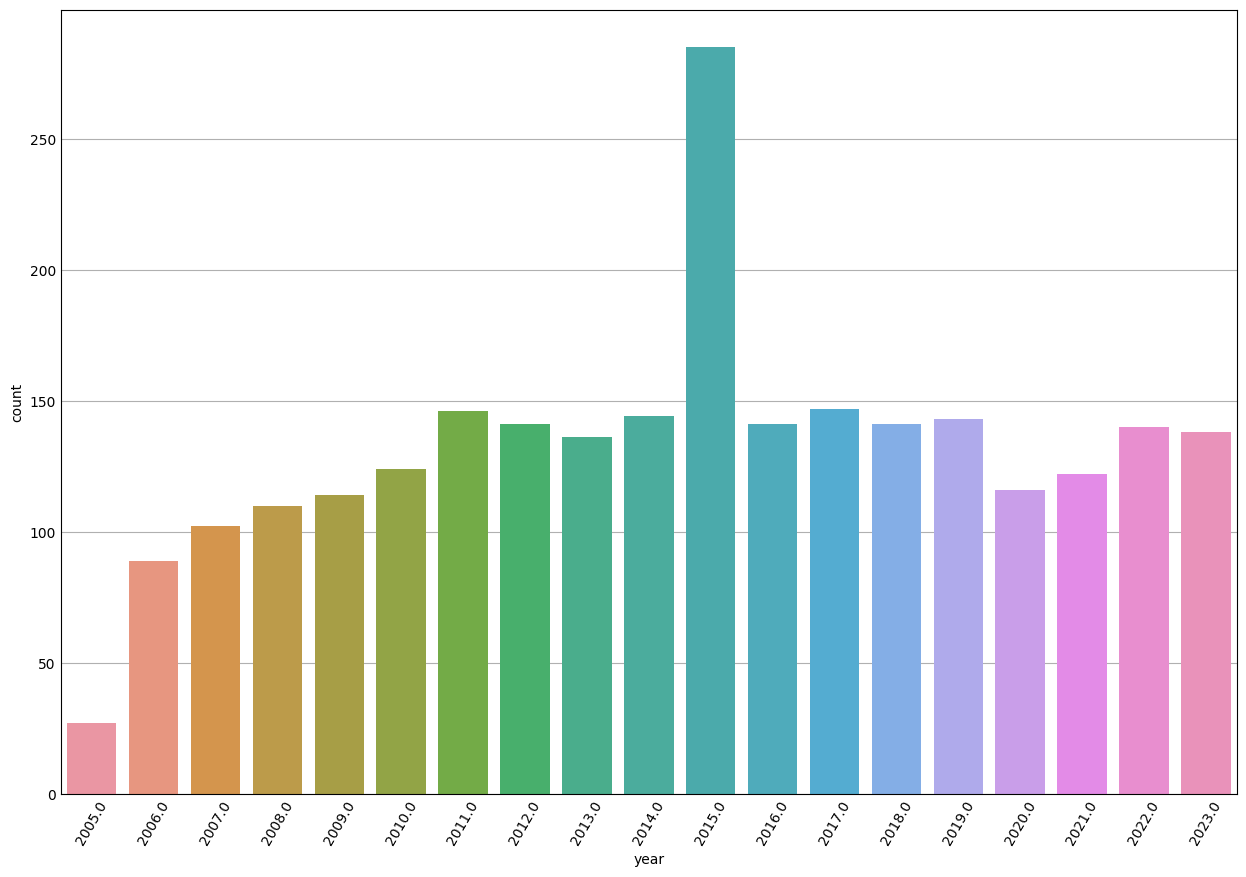

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x ='year', data = df)
plt.xticks(rotation = 60)
plt.show()

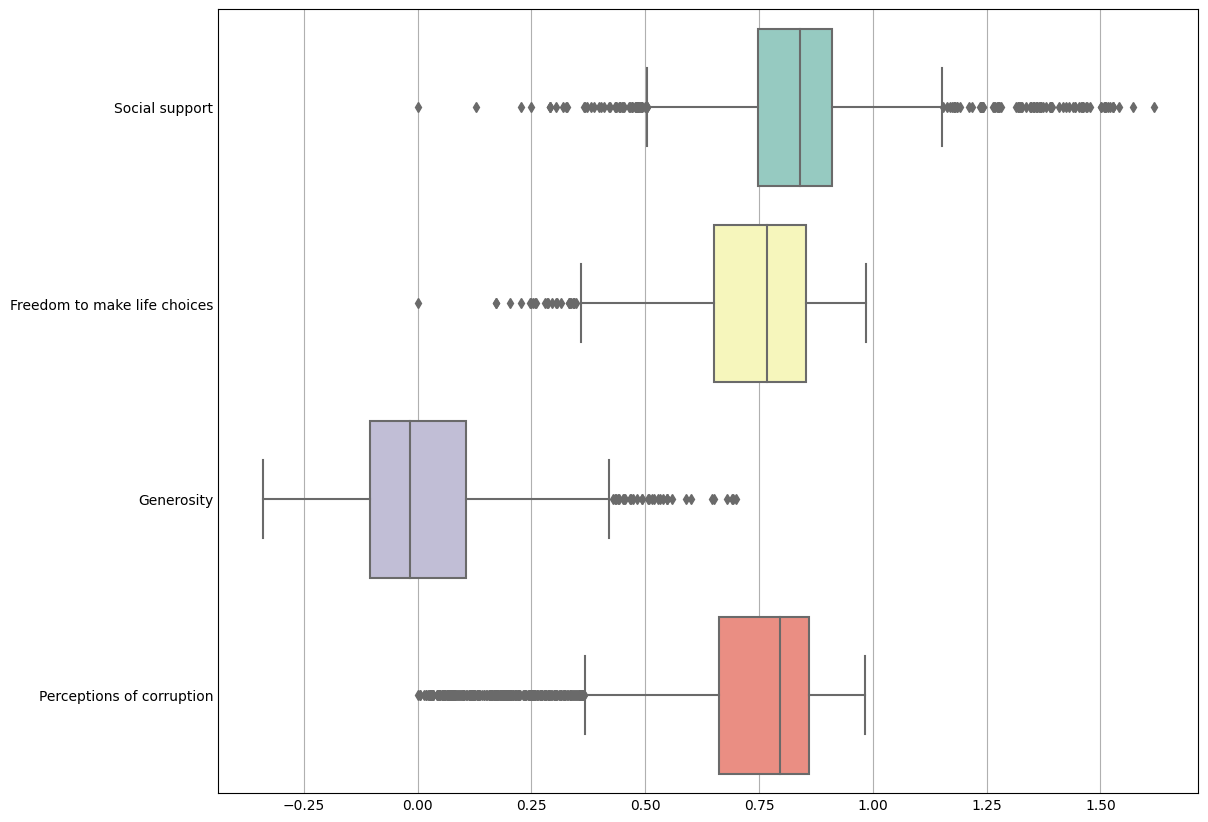

In [21]:
plt.figure(figsize=(10,8))
list_features = ['Social support','Freedom to make life choices','Generosity','Perceptions of corruption']
sns.boxplot(data=df.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

In [22]:
df['Life Ladder'].max()

8.019

In [23]:
df['Life Ladder'].min()

1.281

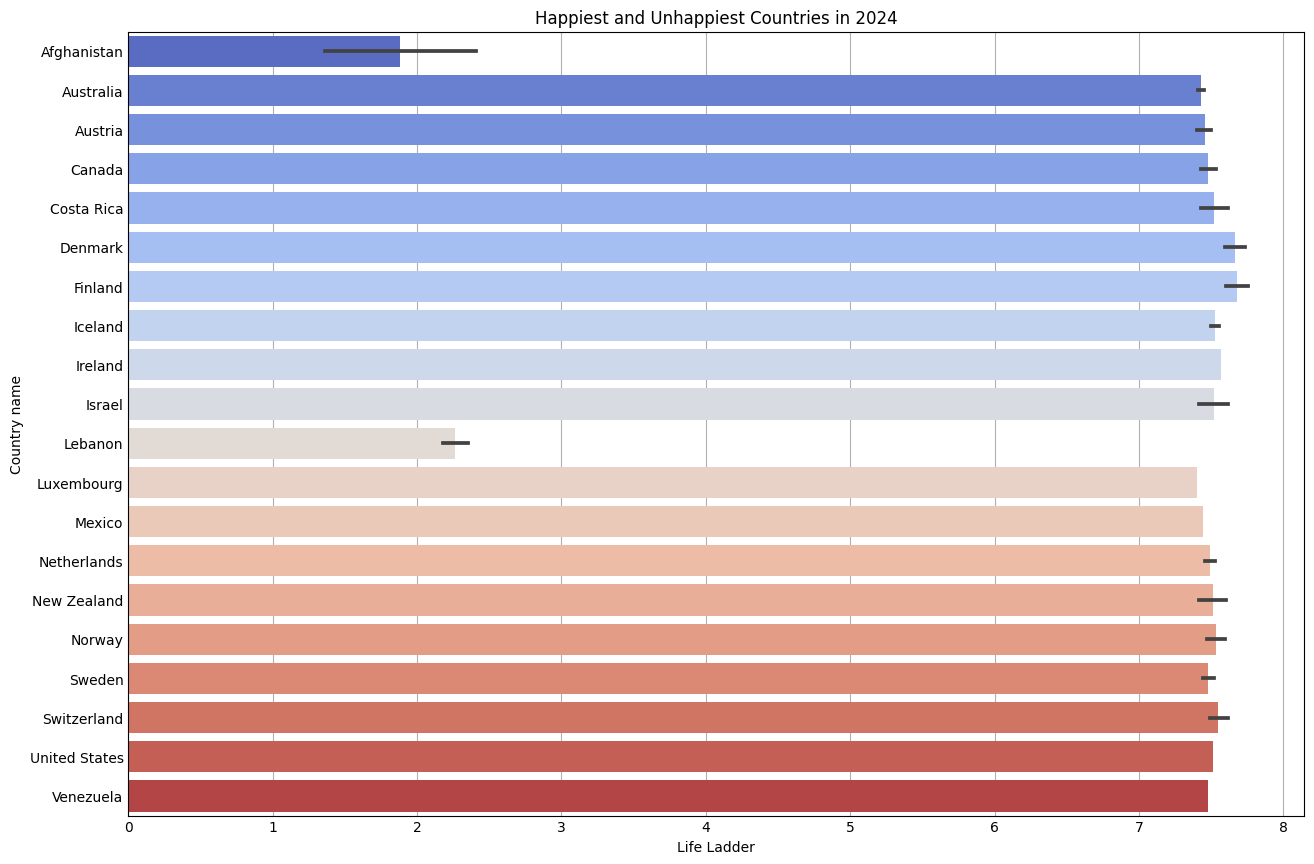

In [24]:
df_happiest_unhappiest = df[(df.loc[:,'Life Ladder']>7.4)|(df.loc[:,'Life Ladder']<2.5)]
plt.figure(figsize=(12,8))
sns.barplot(x = 'Life Ladder', y= 'Country name',data = df_happiest_unhappiest, palette = 'coolwarm')
plt.title('Happiest and Unhappiest Countries in 2024')
plt.show()

In [25]:
import plotly.express as px
fig = px.choropleth(df.sort_values('year'), 
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title = 'Life Ladder Comparison by Contries' )

In [26]:
fig = px.choropleth(df.sort_values('year'),
                   locations = 'Country name',
                   color = 'Generosity',
                   locationmode = 'country names',
                   animation_frame = 'year')
fig.update_layout(title = 'Generosity Comparison by Countries')
fig.show()

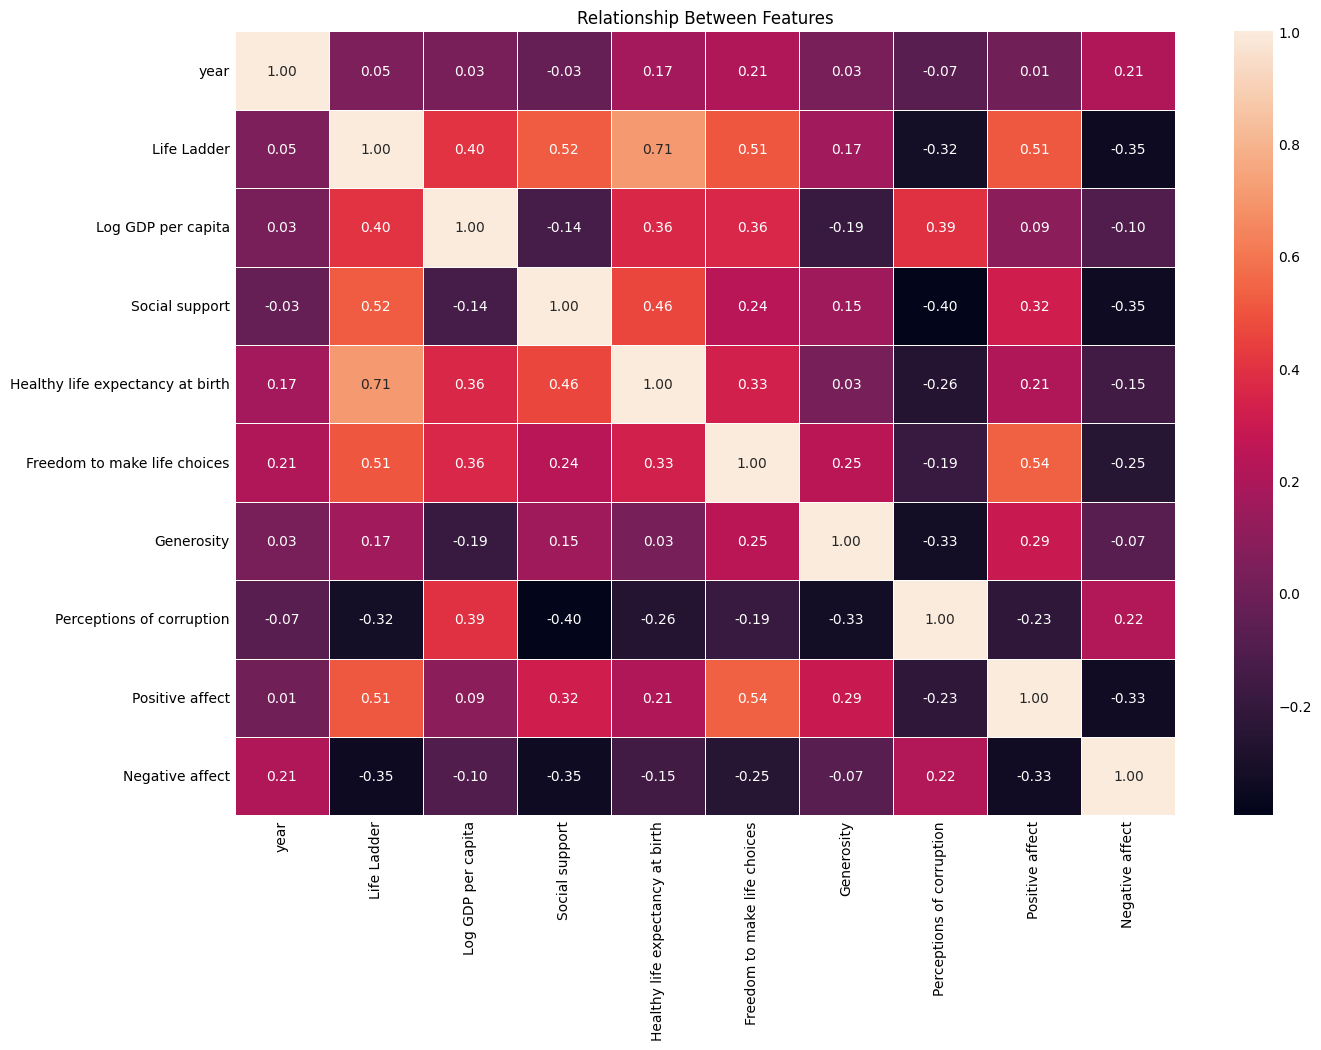

In [27]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f', linewidth = .7)
plt.title('Relationship Between Features')
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler


numerical_features = [
    "Life Ladder", "Log GDP per capita", "Social support", "Healthy life expectancy at birth",
    "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect"
]


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])


df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)


print(df_scaled.head())


   Life Ladder  Log GDP per capita  Social support  \
0    -1.608435           -0.734258       -2.352565   
1    -0.987974           -0.660979       -1.722580   
2    -0.662186           -0.612588       -1.803667   
3    -1.509600           -0.627796       -1.915942   
4    -1.554442           -0.590927       -1.915942   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -1.984837                     -0.176473    0.984900   
1                         -1.939179                     -0.449530    1.129843   
2                         -1.893521                     -1.002647    0.695015   
3                         -1.847862                     -1.730800    0.959693   
4                         -1.802204                     -1.485748    1.426031   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.752212        -2.324530        -0.171236  
1                   0.609788        -1.671853        -0.42

In [29]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)


df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])


explained_variance = pca.explained_variance_ratio_


print(df_pca.head())
print("Explained Variance Ratio:", explained_variance)


        PC1       PC2
0  3.406003  0.554475
1  2.572394  0.748155
2  2.537237  0.876247
3  3.333465  1.135596
4  2.722381  1.205814
Explained Variance Ratio: [0.36969779 0.19104035]


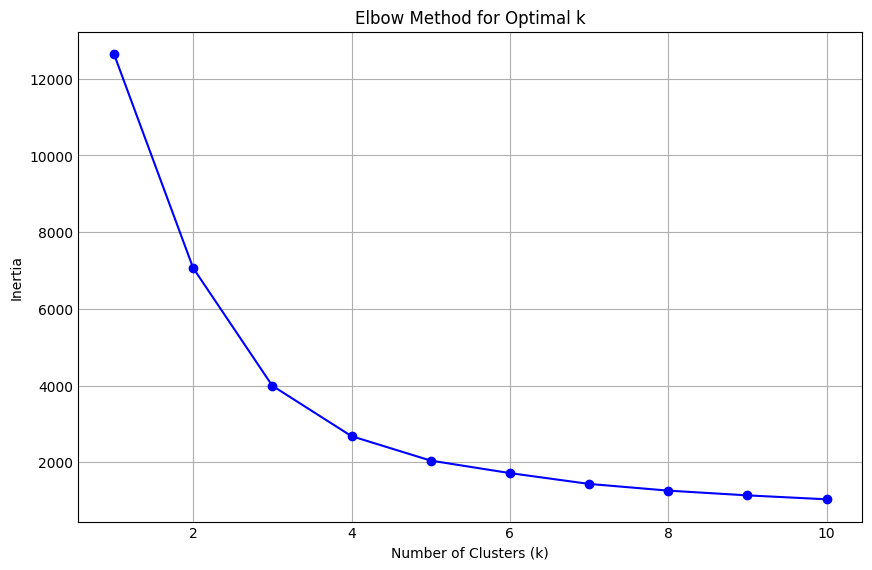

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [31]:

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_pca)


df_pca["Country"] = df["Country name"]


print(df_pca.head())


        PC1       PC2  Cluster      Country
0  3.406003  0.554475        0  Afghanistan
1  2.572394  0.748155        0  Afghanistan
2  2.537237  0.876247        0  Afghanistan
3  3.333465  1.135596        0  Afghanistan
4  2.722381  1.205814        0  Afghanistan


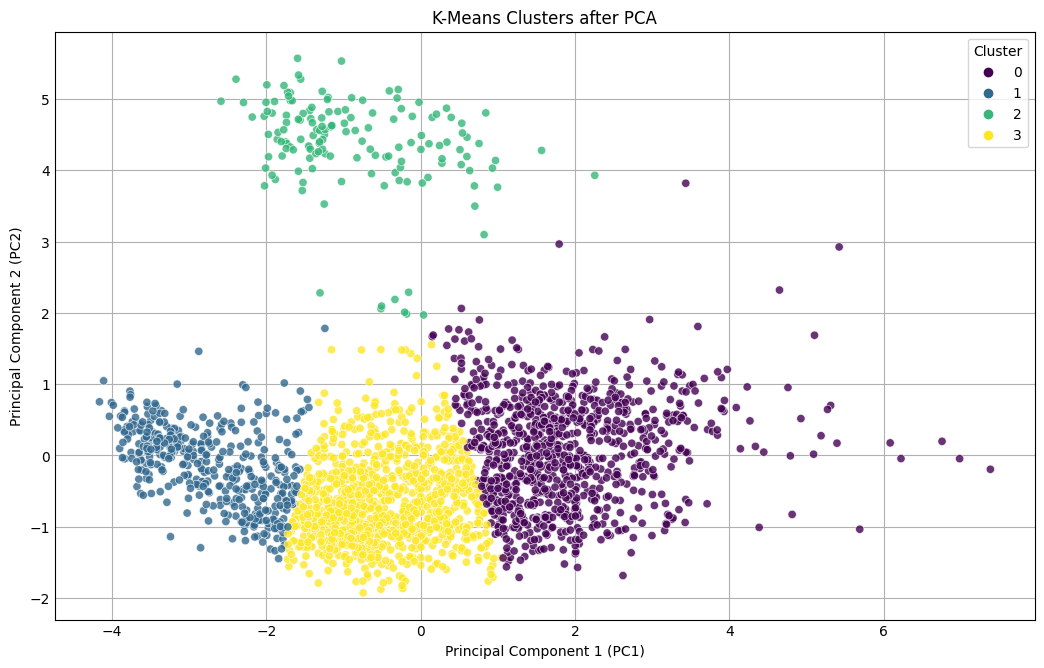

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_pca['PC1'], 
    y=df_pca['PC2'], 
    hue=df_pca['Cluster'],  # Color points by cluster
    palette='viridis', 
    alpha=0.8
)
plt.title('K-Means Clusters after PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.show()


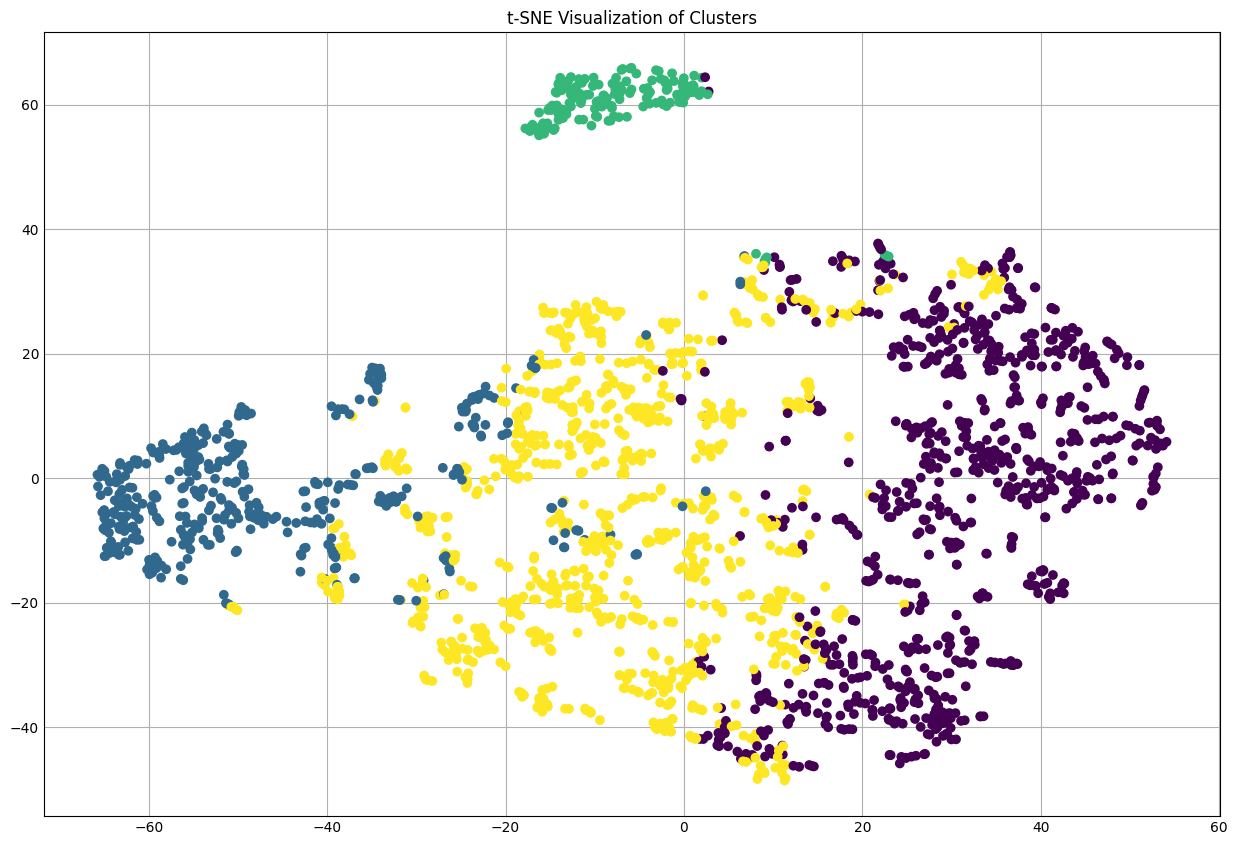

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)
plt.figure(figsize=(12,8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=df_pca['Cluster'], cmap='viridis')
plt.title("t-SNE Visualization of Clusters")
plt.show()


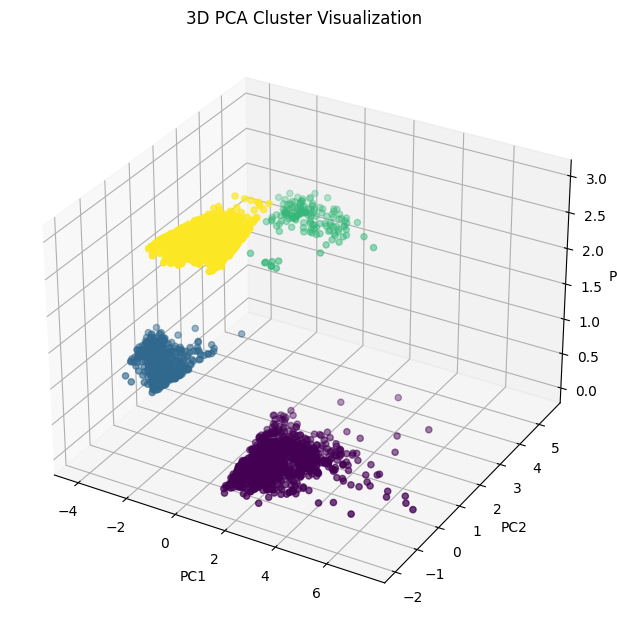

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


df_pca_array = df_pca.to_numpy() if isinstance(df_pca, pd.DataFrame) else df_pca

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_array[:, 0], df_pca_array[:, 1], df_pca_array[:, 2], c=df_pca['Cluster'], cmap='viridis')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Cluster Visualization")

plt.show()


In [35]:
df['Cluster'] = df_pca['Cluster']


country_mapping = df.groupby('Cluster')['Country name'].unique()

print(country_mapping)

Cluster
0    [Afghanistan, Albania, Algeria, Angola, Armeni...
1    [Australia, Austria, Belgium, Canada, Chile, C...
2    [Myanmar, Rwanda, Finland, Denmark, Iceland, S...
3    [Albania, Algeria, Argentina, Armenia, Azerbai...
Name: Country name, dtype: object


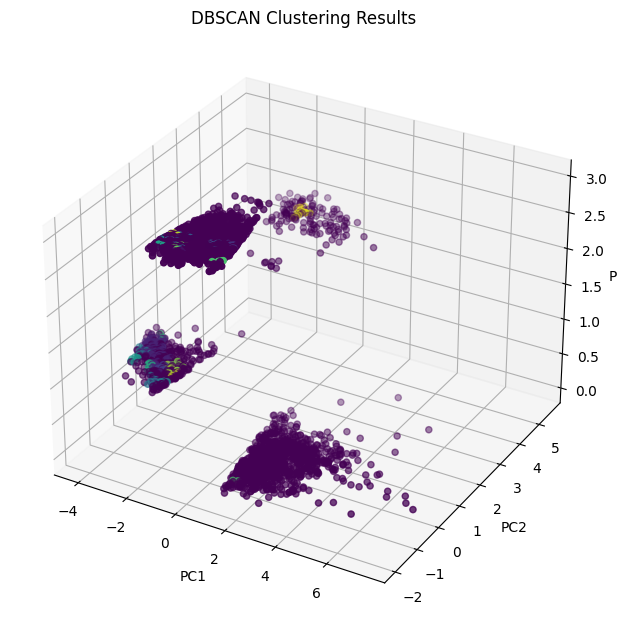

DBSCAN_Cluster
-1     2259
 1      114
 19      12
 17       9
 7        9
 3        8
 9        8
 5        8
 14       7
 18       7
 15       7
 10       7
 8        7
 4        7
 12       6
 11       5
 0        5
 16       5
 2        5
 6        4
 20       4
 13       3
Name: count, dtype: int64


In [36]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(df_scaled)


df["DBSCAN_Cluster"] = dbscan_labels


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_array[:, 0], df_pca_array[:, 1], df_pca_array[:, 2], 
           c=dbscan_labels, cmap='viridis', marker='o')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("DBSCAN Clustering Results")
plt.show()


print(df["DBSCAN_Cluster"].value_counts())

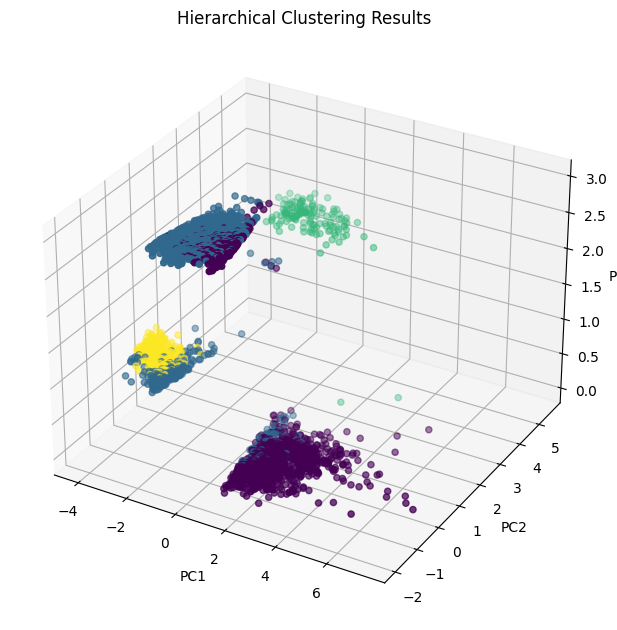

In [37]:
agglo = AgglomerativeClustering(n_clusters=4)  
agglo_labels = agglo.fit_predict(df_scaled)


df["Hierarchical_Cluster"] = agglo_labels


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_array[:, 0], df_pca_array[:, 1], df_pca_array[:, 2], 
           c=agglo_labels, cmap='viridis', marker='o')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Hierarchical Clustering Results")
plt.show()

In [38]:
print(df.groupby("DBSCAN_Cluster")["Country name"].value_counts())
print(df.groupby("Hierarchical_Cluster")["Country name"].value_counts())


DBSCAN_Cluster  Country name
-1              Bangladesh      19
                Cambodia        19
                Cameroon        19
                Ecuador         19
                Egypt           19
                                ..
 19             Tajikistan       1
 20             Argentina        1
                Chile            1
                Mauritius        1
                Montenegro       1
Name: count, Length: 217, dtype: int64
Hierarchical_Cluster  Country name        
0                     Bangladesh              18
                      Cameroon                18
                      Georgia                 18
                      India                   18
                      Lebanon                 18
                                              ..
3                     Singapore               11
                      Belgium                 10
                      Estonia                  4
                      United Arab Emirates     3
              

In [39]:
df.to_csv('World-Happiness.csv')